In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
Male = pd.get_dummies(df['sex'], drop_first = True)
df = pd.concat([df, Male], axis =1)


In [ ]:
Smoker = pd.get_dummies(df['smoker'], drop_first = True)
df = pd.concat([df, Smoker], axis =1)

In [ ]:
df = df.rename(columns = {'yes':'Smoker'})
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
Region = pd.get_dummies(df['region'], drop_first = True)
df = pd.concat([df, Region], axis =1)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,False,True,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,True,False,False


/tmp/ipython-input-28-65274526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data= df, palette = 'GnBu')


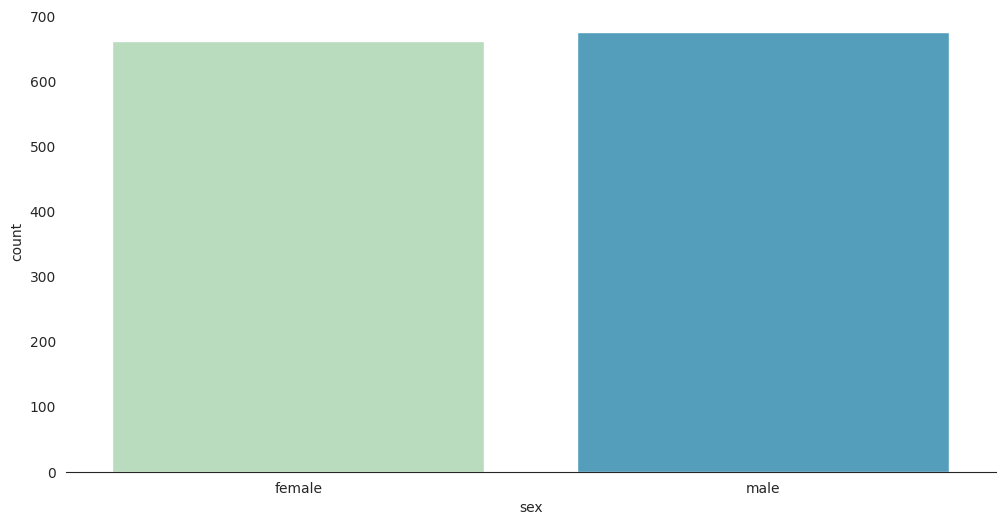

In [ ]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.countplot(x='sex', data= df, palette = 'GnBu')
sns.despine(left = True)

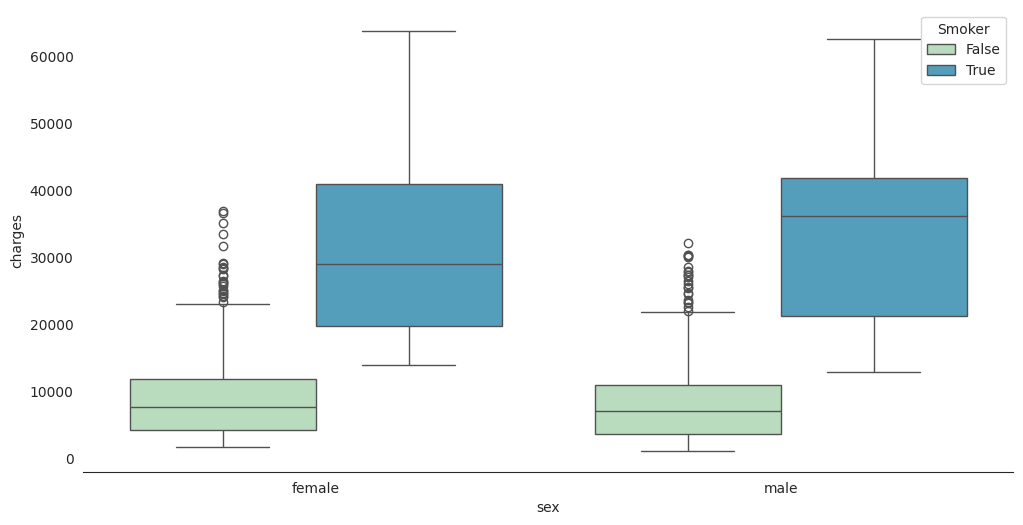

In [ ]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.boxplot(x='sex', y= 'charges', data = df, palette ='GnBu', hue = 'Smoker')
sns.despine(left = True)

<Axes: xlabel='age', ylabel='charges'>

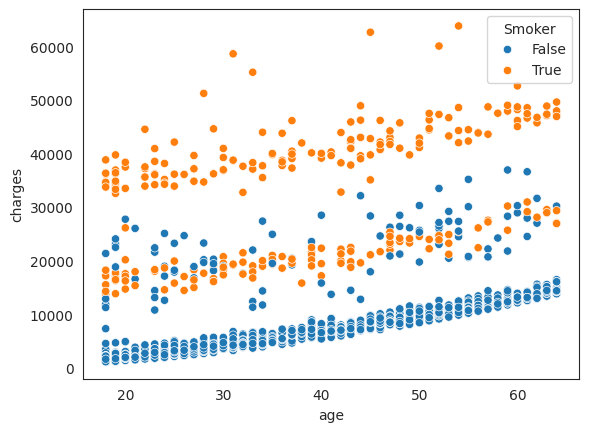

In [ ]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'Smoker')

<Axes: xlabel='bmi', ylabel='charges'>

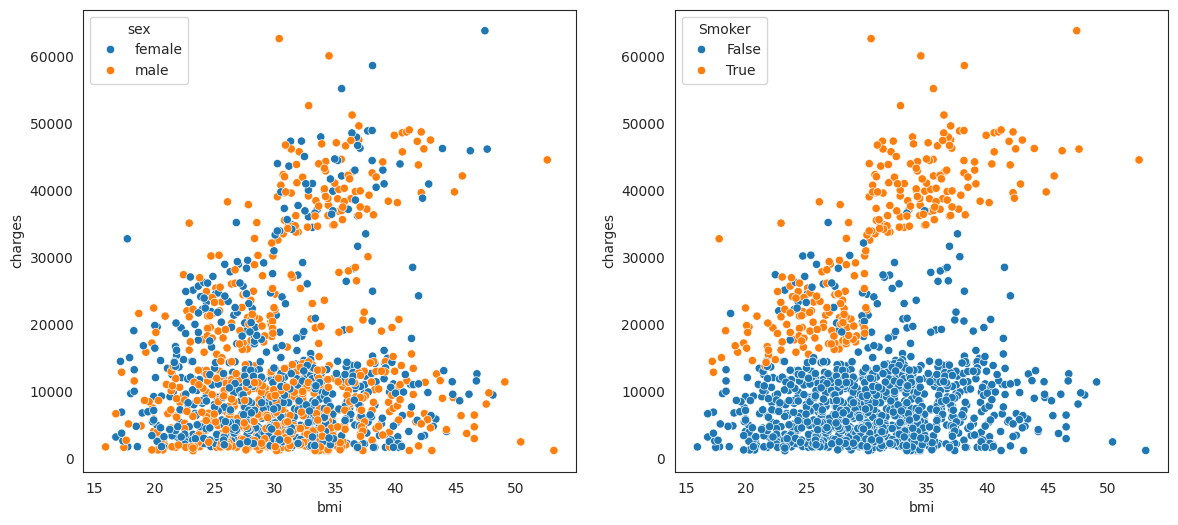

In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex', ax= ax[0])
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker', ax = ax[1])

<Axes: >

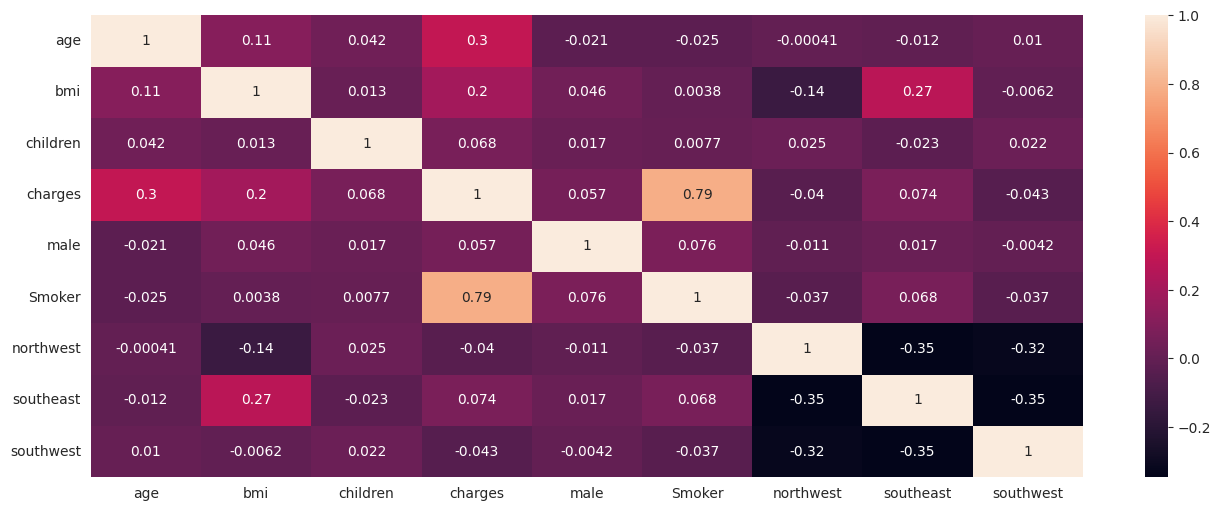

In [ ]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot = True)

In [ ]:
x = df.drop('charges', axis = 1)
y = df['charges']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(scaled_x_train, y_train)

predict = regressor.predict(scaled_x_test)

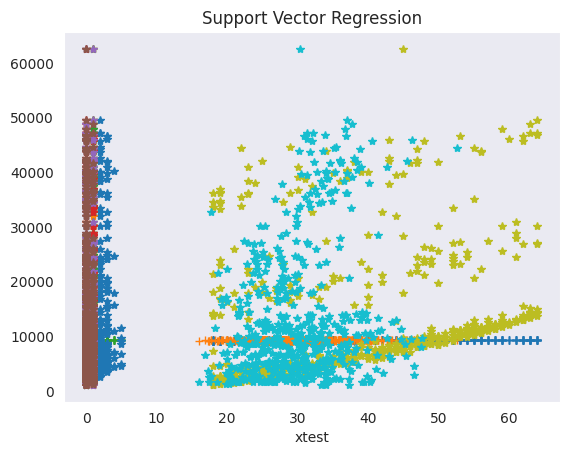

In [ ]:
sns.set_style('dark')
plt.plot(x_test,predict,'+')
plt.plot(x_test,y_test,'*')


plt.title('Support Vector Regression')
plt.xlabel('xtest')
plt.show()

Text(0.5, 0, 'Predict')

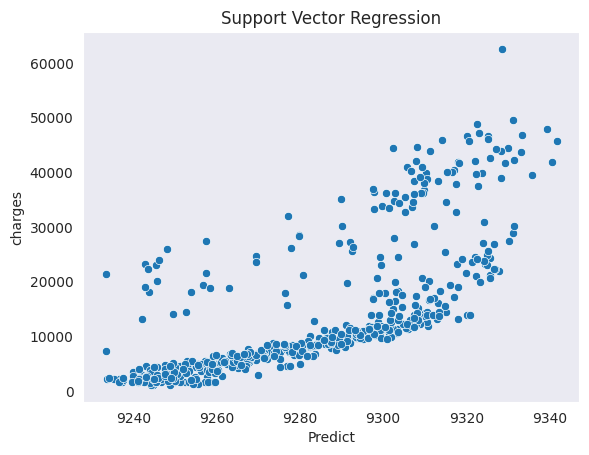

In [ ]:
sns.set_style('dark')
f =sns.scatterplot(x=predict,y=y_test)
f.set_title('Support Vector Regression')
f.set_xlabel('Predict')